In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import json
from networkx.drawing.nx_agraph import graphviz_layout
import pygraphviz

In [9]:
def load_graphs(file_path):
    with open(file_path, 'r') as file:
        graphs = json.load(file)
    return graphs

In [10]:
def create_networkx_graph(graph_data, labels):
    G = nx.Graph()
    
    # Add nodes with features
    for idx, features in enumerate(graph_data['node_features']):
        G.add_node(idx, features=features, label=round(features[0]))

    # Add edges with features
    for edge_idx, edge in enumerate(graph_data['edge_index']):
        u, v = edge
        weight = graph_data['edge_features'][edge_idx][0]
        G.add_edge(u, v, weight=weight, label=round(weight,2))
    
    return G

In [11]:
def draw_graph(G, labels, title='Graph', save=True):

    fig, ax = plt.subplots(figsize=(20, 20))

    pos = graphviz_layout(G) if G.number_of_nodes() % 2 else nx.spring_layout(G)
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=4000, node_color='lightblue')
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    
    # Draw node labels
    nx.draw_networkx_labels(G, pos, labels, font_size=16)
    
    # Draw edge labels (weights)
    # edge_labels = nx.get_edge_attributes(G, 'weight')

    edge_labels = dict([((u,v,), f"{d['weight']:.2f}") for u,v,d in G.edges(data=True)])

    # print(edge_labels)

    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)
    
    plt.title(title)
    if save: plt.savefig(title + ".png", dpi=400)
    plt.show()

In [16]:
def draw_two_graphs(G1, G2, title1='Graph 1', title2='Graph 2', save=None):
    pos1 = nx.spring_layout(G1)  # positions for all nodes in graph 1
    pos2 = nx.spring_layout(G2)  # positions for all nodes in graph 2
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Draw first graph
    node_labels1 = nx.get_node_attributes(G1, 'label')
    edge_labels1 = nx.get_edge_attributes(G1, 'label')
    nx.draw(G1, pos1, ax=axes[1], with_labels=True, labels=node_labels1, node_color='lightblue', node_size=2500)
    nx.draw_networkx_edge_labels(G1, pos1, edge_labels=edge_labels1, ax=axes[1])
    axes[1].set_title(title1)
    
    # Draw second graph
    node_labels2 = nx.get_node_attributes(G2, 'label')
    edge_labels2 = nx.get_edge_attributes(G2, 'label')
    nx.draw(G2, pos2, ax=axes[0], with_labels=True, labels=node_labels2, node_color='lightgreen', node_size=2500)
    nx.draw_networkx_edge_labels(G2, pos2, edge_labels=edge_labels2, ax=axes[0])
    axes[0].set_title(title2)
    plt.show()

In [21]:
def get_pair(graph_num, draw=False, save=False):
    input_graphs_path = 'hadron_level_graphs_.json'
    output_graphs_path = 'parton_level_graphs_.json'
    
    labels1 = {}
    labels2 = {}
    
    input_graphs = load_graphs(input_graphs_path)
    output_graphs = load_graphs(output_graphs_path)
    
    input_graph_data = input_graphs[graph_num]
    output_graph_data = output_graphs[graph_num]
    
    G_input = create_networkx_graph(input_graph_data, labels1)
    G_output = create_networkx_graph(output_graph_data, labels2)
    
    # Draw the graphs
    if draw: draw_two_graphs(G_input, G_output, "Hadron-Level Graph", "Parton-Level Graph")

    return G_input, G_output

In [24]:
hadron_mult = []
parton_mult = []
for i in range(250):    
    G_input, G_output = get_pair(i)
    parton_mult.append(G_input.number_of_nodes())
    hadron_mult.append(G_output.number_of_nodes())
    # if (G_input.number_of_nodes() < 10 and G_output.number_of_nodes() < 10):
    print(f"Event number {i} has {G_input.number_of_nodes()} hadron(s) and {G_output.number_of_nodes()} parton(s).")

Event number 0 has 71 hadron(s) and 23 parton(s).
Event number 1 has 18 hadron(s) and 11 parton(s).
Event number 2 has 20 hadron(s) and 12 parton(s).
Event number 3 has 65 hadron(s) and 26 parton(s).
Event number 4 has 27 hadron(s) and 10 parton(s).
Event number 5 has 9 hadron(s) and 1 parton(s).
Event number 6 has 38 hadron(s) and 11 parton(s).
Event number 7 has 95 hadron(s) and 36 parton(s).
Event number 8 has 8 hadron(s) and 4 parton(s).
Event number 9 has 3 hadron(s) and 2 parton(s).
Event number 10 has 20 hadron(s) and 6 parton(s).
Event number 11 has 69 hadron(s) and 23 parton(s).
Event number 12 has 43 hadron(s) and 19 parton(s).
Event number 13 has 2 hadron(s) and 2 parton(s).
Event number 14 has 2 hadron(s) and 1 parton(s).
Event number 15 has 8 hadron(s) and 2 parton(s).
Event number 16 has 91 hadron(s) and 20 parton(s).
Event number 17 has 111 hadron(s) and 31 parton(s).
Event number 18 has 62 hadron(s) and 21 parton(s).
Event number 19 has 3 hadron(s) and 3 parton(s).
Even

In [ ]:
hadron_mult = []
parton_mult = []
for i in range(250):    
    G_input, G_output = get_pair(i)
    parton_mult.append(G_input.number_of_nodes())
    hadron_mult.append(G_output.number_of_nodes())
    if (G_input.number_of_nodes() < 10 and G_output.number_of_nodes() < 10):
        print(f"Event number {i} has {G_input.number_of_nodes()} hadron(s) and {G_output.number_of_nodes()} parton(s).")

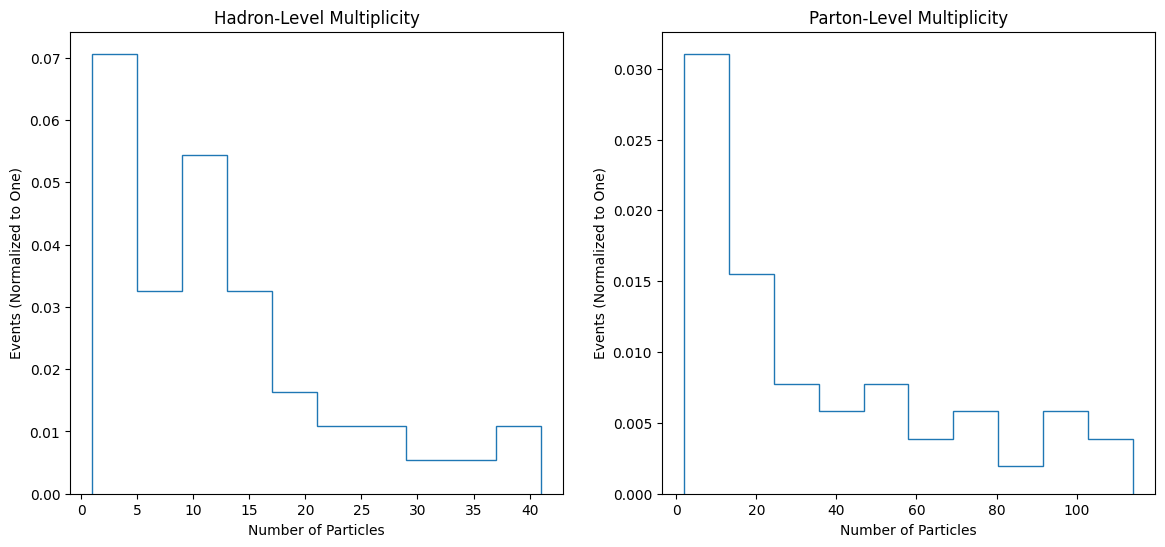

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].hist(hadron_mult, density=True, histtype='step')
axes[0].set_title("Hadron-Level Multiplicity")
axes[0].set_xlabel("Number of Particles")
axes[0].set_ylabel("Events (Normalized to One)")


axes[1].hist(parton_mult, density=True, histtype='step')
axes[1].set_title("Parton-Level Multiplicity")
axes[1].set_xlabel("Number of Particles")
axes[1].set_ylabel("Events (Normalized to One)")

plt.show()

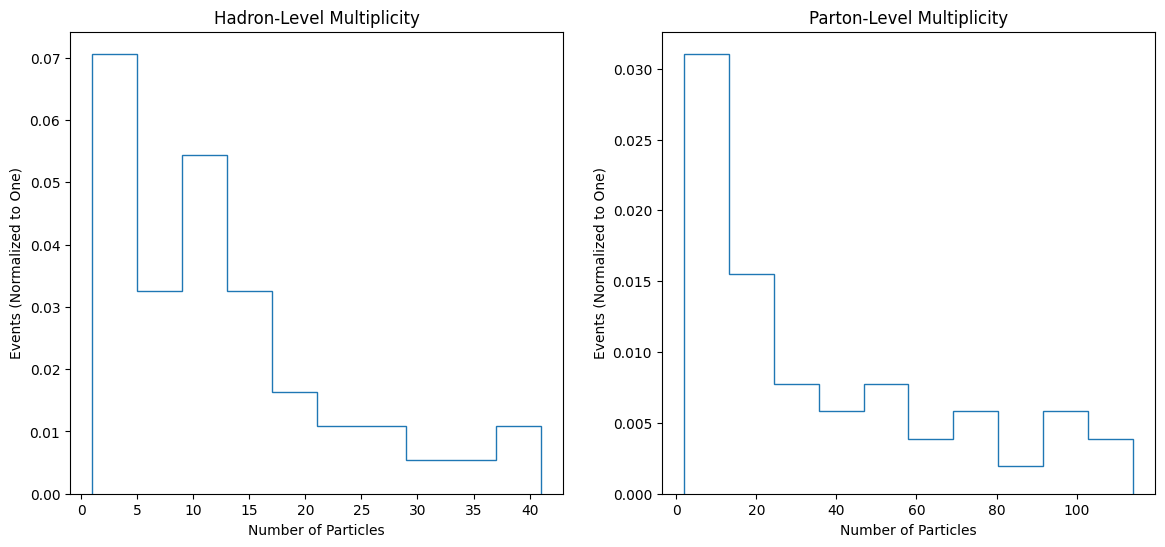

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].hist(hadron_mult, density=True, histtype='step')
axes[0].set_title("Hadron-Level Multiplicity")
axes[0].set_xlabel("Number of Particles")
axes[0].set_ylabel("Events (Normalized to One)")


axes[1].hist(parton_mult, density=True, histtype='step')
axes[1].set_title("Parton-Level Multiplicity")
axes[1].set_xlabel("Number of Particles")
axes[1].set_ylabel("Events (Normalized to One)")

plt.show()

In [20]:
get_pair(13, True)

FileNotFoundError: [Errno 2] No such file or directory: 'hadron_level_graphs.json'

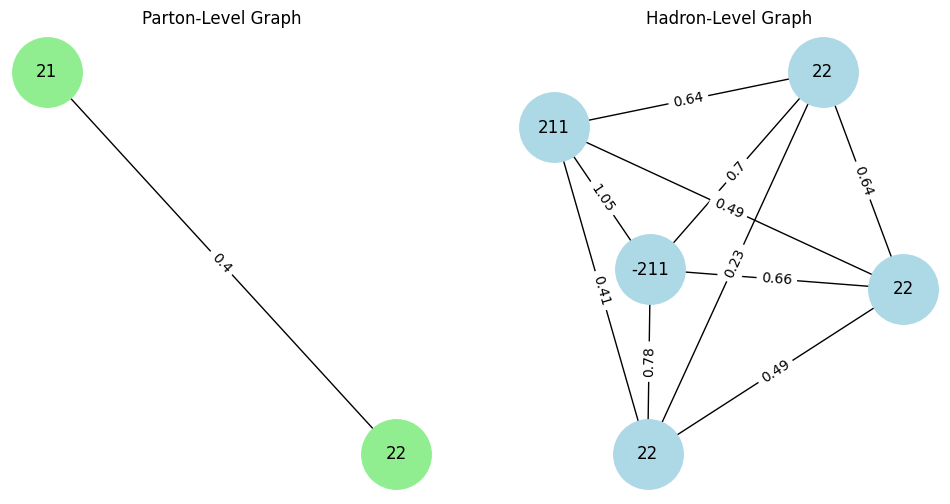

(<networkx.classes.graph.Graph at 0x1309df860>,
 <networkx.classes.graph.Graph at 0x130d0ac00>)

In [12]:
get_pair(58, True)

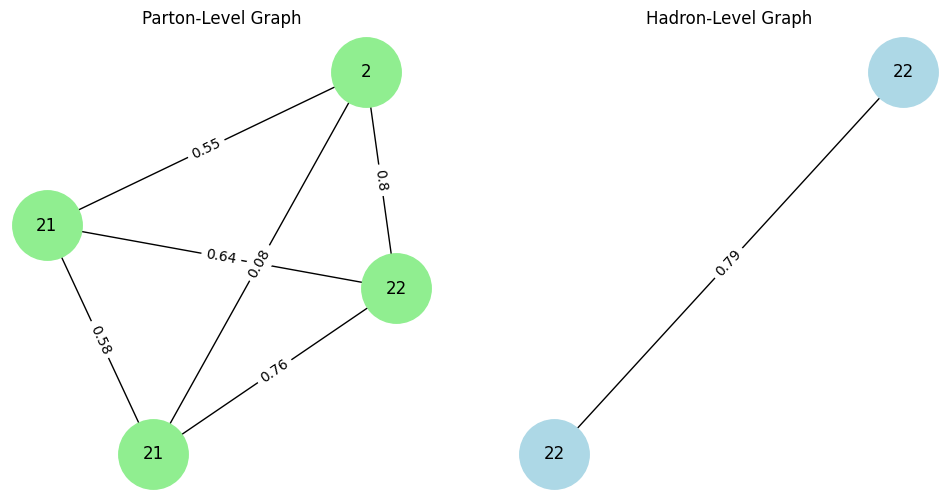

(<networkx.classes.graph.Graph at 0x1308d2420>,
 <networkx.classes.graph.Graph at 0x1308d0170>)

In [13]:
get_pair(138, True)

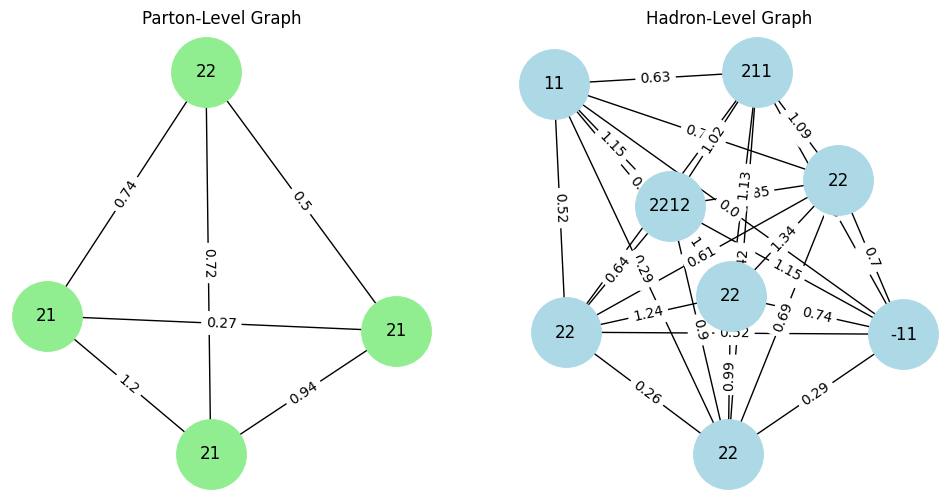

(<networkx.classes.graph.Graph at 0x13ec3e900>,
 <networkx.classes.graph.Graph at 0x13f24fb00>)

In [18]:
get_pair(102, True)

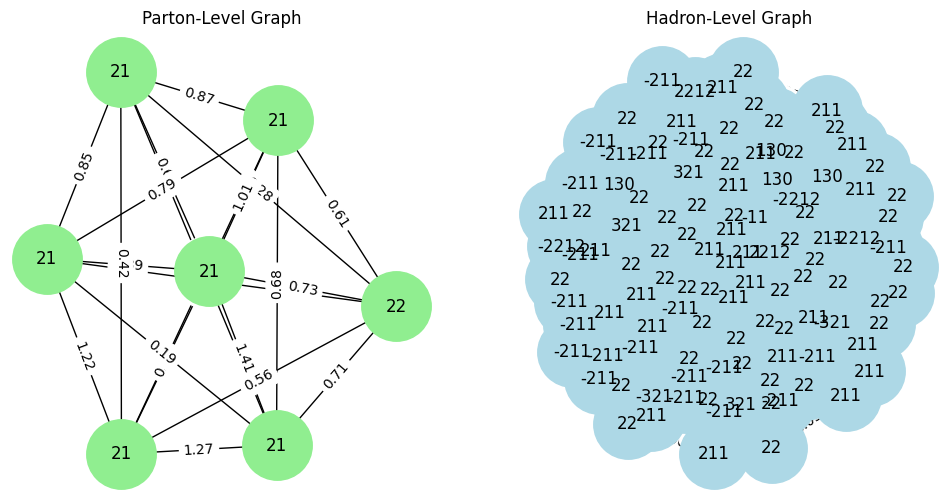

(<networkx.classes.graph.Graph at 0x124e2ee70>,
 <networkx.classes.graph.Graph at 0x124de0ad0>)

In [14]:
get_pair(249, True)